In [1]:
!pip install geopandas

     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---- ----------------------------------- 0.1/1.1 MB 1.6 MB/s eta 0:00:01
     --------- ------------------------------ 0.2/1.1 MB 2.5 MB/s eta 0:00:01
     -------------- ------------------------- 0.4/1.1 MB 2.1 MB/s eta 0:00:01
     ------------------ --------------------- 0.5/1.1 MB 2.2 MB/s eta 0:00:01
     ------------------ --------------------- 0.5/1.1 MB 2.2 MB/s eta 0:00:01
     ----------------------- ---------------- 0.6/1.1 MB 2.1 MB/s eta 0:00:01
     ---------------------------- ----------- 0.7/1.1 MB 2.1 MB/s eta 0:00:01
     --------------------------------- ------ 0.9/1.1 MB 2.1 MB/s eta 0:00:01
     -------------------------------------- - 1.0/1.1 MB 2.2 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     --

c:\Users\ishaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


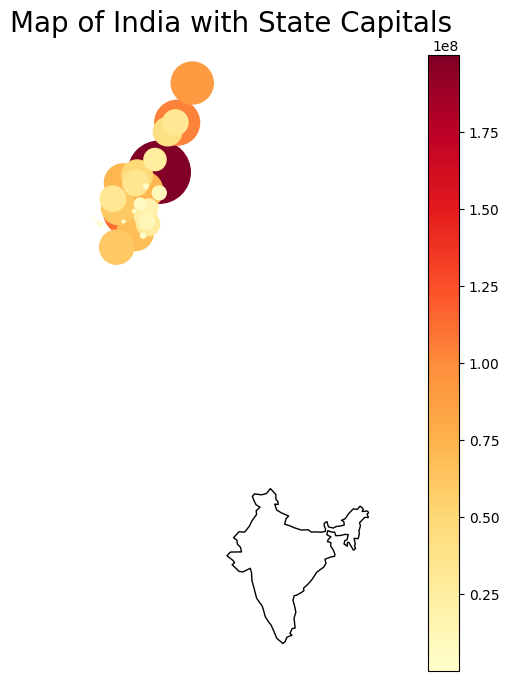

In [61]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd
import seaborn as sns

# Read the world map data from geopandas datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map data to get only India
india = world[world.name == 'India']

# Define the data of Indian state capitals and their population

states = ['Uttar Pradesh', 'Maharashtra', 'Bihar', 'West Bengal', 'Madhya Pradesh', 'Tamil Nadu', 'Rajasthan', 'Karnataka', 'Gujarat', 'Andhra Pradesh', 'Odisha', 'Telangana', 'Kerala',   'Jharkhand', 'Assam', 'Punjab', 'Chhattisgarh', 'Haryana', 'Delhi', 'Jammu & Kashmir', 'Uttarakhand', 'Himachal Pradesh', 'Tripura', 'Meghalaya', 'Manipur', 'Nagaland',      'Goa', 'Arunachal Pradesh', 'Puducherry', 'Mizoram', 'Chandigarh', 'Sikkim', 'Dadra & Nagar Haveli and Daman & Diu', 'Andaman & Nicobar', 'Ladakh', 'Lakshadweep']
populations = [199812341,   112374333,   104099452, 91276115,       72626809,      72147030,       68548437,     61095297,    60439692,    49386799,     41974218,     35193978,   33406061,  32988134,   31205576,  27743338,  25545198,    25351462,   16787941,   12258433,      10086292,         6864602,         3673917,   2966889,     2855794,     1978502,     1458545,   1383727,            1247953,      1097206,      1055450,   610577,            586956,                          380581,            274289,     64473]
longitudes = [80.9462,       75.7139,      85.3131,  87.8550,        78.6569,      78.3875,        73.8567,       75.7139,     71.1924,     79.7400,     84.4294,      79.0193,    76.2711,    85.2799,   92.9376,    75.3412,    81.8661,    76.0856,    77.1025,    75.5670,       79.0193,          77.1734,         91.9882,    93.9368,   92.9376,      93.9063,     94.1160,  73.8282,           94.7278,       79.1389,      92.9376,   76.1508,          72.8397,                         74.5009,            72.9543,    73.0485]
latitudes = [26.8467,         19.7515,     25.0961,   22.9868,        22.9734,      11.1271,       27.0238,        15.3173,    22.2587,     15.9129,      20.9517,     17.1232,    10.8505,     23.6102,   26.2006,   31.1471,    21.2787,     28.7041,   28.7041,    30.0668,       31.1048,          23.9408,          23.1645,    23.9408,   23.1645,     25.4670,     15.2993,  30.7333,           11.9416,        22.9868,     27.0238,   22.7265,          11.7401,                         20.2666,            10.5626,    8.295441]

data = {
    'City' : states,
    'Latitude': longitudes,
    'Longitude': latitudes,
    'Population': populations
}

df = pd.DataFrame(data)


# Define the projection of the map
india = india.to_crs(epsg=24378)

# Create a GeoDataFrame with the state capitals
geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
crs = {'init': 'epsg:4326'}
capitals = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

# Transform the projection of the state capitals to match the map
capitals = capitals.to_crs(epsg=24378)

# Plot the map of India with the state capitals as bubbles
fig, ax = plt.subplots(figsize=(12,8))

# Create a variable for the marker size
marker_size = capitals['Population'].astype(float) / 100000

# Plot the map with state boundaries
india.plot(ax=ax, color='white', edgecolor='black')

# Plot the state capitals with markers proportional to population
capitals.plot(ax=ax, column='Population', cmap='YlOrRd', markersize=marker_size, legend=True)

# Add a title to the plot
plt.title("Map of India with State Capitals", fontsize=20)

# Add a title to the plot
plt.title("Map of India with State Capitals", fontsize=20)

# Remove the axis
ax.axis('off')

# Show the plot
plt.show()

In [54]:
lengths = {key: len(value) for key, value in data.items()}
print(lengths)

{'City': 36, 'Latitude': 36, 'Longitude': 36, 'Population': 36}
